# Impact of international conflicts on the Russian currency

This project uses Euro exchange data to understand how international conflicts impact the Russian currency.

Euro exchange data, from its creation in 1999 to the present day, can be found [here](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020).

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Data Analysis

First let's look at the data

In [2]:
euro = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [3]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6068 non-null   object 
 1   [Australian dollar ]      6068 non-null   object 
 2   [Bulgarian lev ]          5666 non-null   object 
 3   [Brazilian real ]         5800 non-null   object 
 4   [Canadian dollar ]        6068 non-null   object 
 5   [Swiss franc ]            6068 non-null   object 
 6   [Chinese yuan renminbi ]  5800 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6068 non-null   object 
 9   [Danish krone ]           6068 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6068 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6068 non-null   object 
 14  [Croatia

In this dataset, we find 41 columns, the first being the conversion date and the other 40 referring to countries and the euro's value converted to the local currency on that date.

Most of the information is in text form.

The dataset currently has 6068 rows, but many columns have null values.

In [4]:
euro

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-06-15,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.5290,18.0465,1.0431,16.7111
1,2022-06-14,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.5660,18.0600,1.0452,16.7959
2,2022-06-13,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.4250,18.0495,1.0455,16.8070
3,2022-06-10,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.7740,18.0116,1.0578,16.5209
4,2022-06-09,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.0790,18.5104,1.0743,16.4132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6064,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6065,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6066,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


### Cleaning

As mentioned, the dataset has 6068 entries, and they are arranged in descending order of time. To make the work more accessible, we will change the name of the columns **"period\Unit"** and **"[Russian rouble ]"** to **"Time"** and **"Rouble"**respectively. Also, the "Time" column will be converted to DateTime format and sorted in ascending order.

In [5]:
euro.rename(columns={'[Russian rouble ]':'rouble','Period\\Unit:': 'Time'}, inplace=True)
euro['Time'] = pd.to_datetime(euro['Time'])
euro.sort_values('Time', inplace=True)
euro.reset_index(drop=True, inplace=True)

In [6]:
euro_to_rouble = euro[['Time','rouble']]
euro_to_rouble['rouble'].value_counts()

-          62
35.2250     4
40.6500     4
39.6750     4
43.9800     4
           ..
26.4853     1
34.1559     1
70.4935     1
40.2625     1
64.3953     1
Name: rouble, Length: 5705, dtype: int64

In addition to the null values, in the data "Rouble" column are 62 entries without any value. These values will be removed from the dataset along with the null entries.

In [7]:
euro_to_rouble = euro_to_rouble[euro_to_rouble['rouble'] != '-']
euro_to_rouble['rouble'] = euro_to_rouble['rouble'].astype(float)

In [8]:
euro_to_rouble = euro_to_rouble.dropna()

### Chart analysis

In [9]:
euro_to_rouble['rolling_mean'] = euro_to_rouble['rouble'].rolling(30).mean()

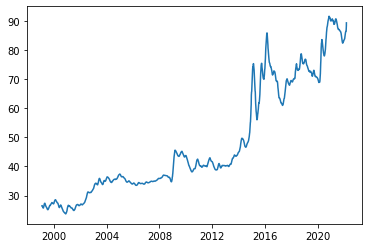

In [10]:
plt.plot(euro_to_rouble['Time'], euro_to_rouble['rolling_mean'])
plt.show()

It is possible to notice an increase occurring after 2014. Therefore, an analysis of the curve before and after 2014 is performed.

In [11]:
euro_to_rouble['Year'] = euro_to_rouble['Time'].dt.year

In [12]:
b2014 = euro_to_rouble[euro_to_rouble['Year']<2014.0]
a2014 = euro_to_rouble[euro_to_rouble['Year']>=2014.0]

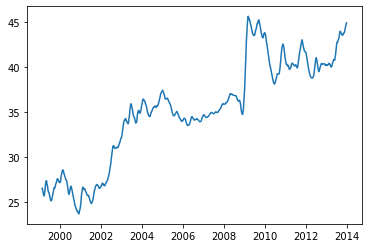

In [13]:
plt.plot(b2014['Time'], b2014['rolling_mean'])
plt.show()

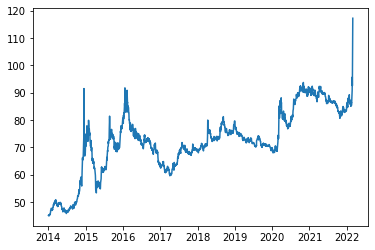

In [14]:
plt.plot(a2014['Time'], a2014['rouble'])
plt.show()

Through research, it was possible to confirm that the variation in the Russian exchange rate is linked to international conflicts and how the country relates to other nations. Therefore,  the final graph was decided to use the exchange rate variation over all the years.

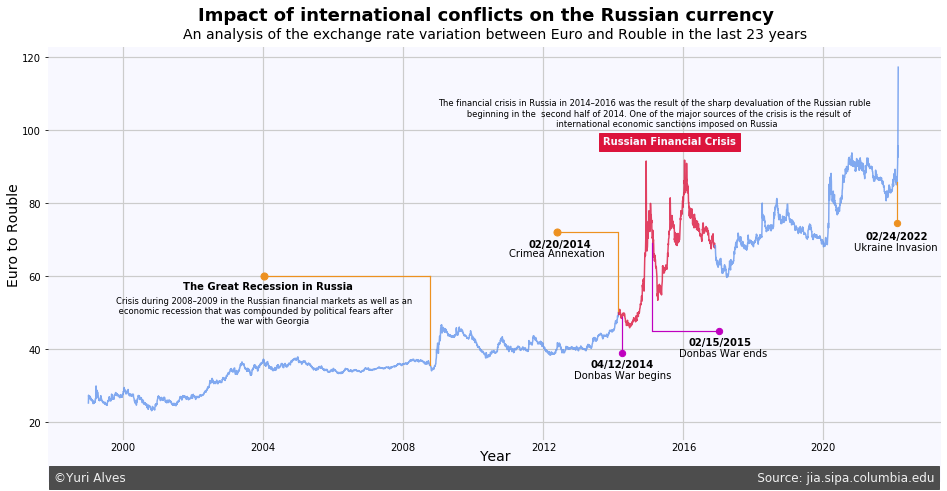

In [15]:
# Creating a mask to plot the Russian financial crisis 2014-2016
A = euro_to_rouble['Time']>='2014-03-01'
B = euro_to_rouble['Time']<='2016-12-01'

fig, ax = plt.subplots(1,1, figsize=(16,8))
ax.plot(euro_to_rouble[~A]['Time'], euro_to_rouble[~A]['rouble'], color='#6495ED', alpha=0.8, zorder=2)
ax.plot(euro_to_rouble[A&B]['Time'], euro_to_rouble[A&B]['rouble'], color='#DC143C',alpha=0.8, zorder=2)
ax.plot(euro_to_rouble[~B]['Time'], euro_to_rouble[~B]['rouble'], color='#6495ED', alpha=0.8, zorder=2)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_facecolor('#F8F8FF')
ax.grid(color='#CCCCCC', linestyle='solid', lw = 1.2, axis='y')


ax.text(x=733850,y=9.5,s='Year',size=14)
ax.text(x=728910,y=58,s='Euro to Rouble',size=14, rotation = 'vertical')

ax.text(x=730900,y=130,s='Impact of international conflicts on the Russian currency',size=18, weight ='bold')
ax.text(x=730750,y=125,s='An analysis of the exchange rate variation between Euro and Rouble in the last 23 years',size=14)


# The Great Recession in Russia
ax.axvline(x=datetime.strptime('2008-10-10', '%Y-%m-%d'), ymin=0.27, ymax=0.475, lw=1.2, color='#ED9121', zorder=3) 
ax.axhline(60, xmin=0.24, xmax=0.428, lw=1.2, color='#ED9121', zorder=3)
ax.scatter(731590,60,s=50, facecolors='#ED9121', edgecolors='#ED9121', zorder=3)
ax.text(x=730750,y=56.5,s='The Great Recession in Russia', weight='bold') 
ax.text(x=730050,y=47,s='Crisis during 2008–2009 in the Russian financial markets as well as an\n economic recession that was compounded by political fears after\n'+40*' '+'the war with Georgia', size ='small')

# Crimea annexation
ax.axvline(x=datetime.strptime('2014-02-20', '%Y-%m-%d'), ymin=0.395, ymax=0.575, lw=1.2, color='#ED9121', zorder=3) 
ax.axhline(72, xmin=0.57, xmax=0.638, lw=1.2, color='#ED9121', zorder=3)
ax.scatter(734650,72,s=50, facecolors='#ED9121', edgecolors='#ED9121', zorder=3)
ax.text(x=734350,y=68,s='02/20/2014', weight='bold') 
ax.text(x=734150,y=65.5,s='Crimea Annexation') 

# War in Donbas
#Begin of war in Donbas
ax.axvline(x=datetime.strptime('2014-04-12', '%Y-%m-%d'), ymin=0.30, ymax=0.38, lw=1.2, color='m', zorder=3)
ax.scatter(datetime.strptime('2014-04-12', '%Y-%m-%d'),38.9,s=40, facecolors='m', edgecolors='m', zorder=3)
ax.text(x=735000,y=35,s='04/12/2014', weight='bold')
ax.text(x=734830,y=32,s='Donbas War begins')


#End of war in Donbas
ax.axvline(x=datetime.strptime('2015-02-15', '%Y-%m-%d'), ymin=0.35, ymax=0.55, lw=1.2, color='m', zorder=3) 
ax.axhline(45, xmin=0.677, xmax=0.75, lw=1.2, color='m', zorder=3)
ax.scatter(736340,45,s=40, facecolors='m', edgecolors='m', zorder=3)
ax.text(x=736030,y=41,s='02/15/2015', weight='bold')
ax.text(x=735930,y=38,s='Donbas War ends')

# Russian financial crisis 2014-2016
ax.text(x=735130,y=96,s='Russian Financial Crisis', weight='bold', backgroundcolor='#DC143C', color='#F8F8FF')
ax.text(x=733410,y=101,s='The financial crisis in Russia in 2014–2016 was the result of the sharp devaluation of the Russian ruble\n           beginning in the  second half of 2014. One of the major sources of the crisis is the result of\n'+45*' '+'international economic sanctions imposed on Russia', size='small')

# Ukraine invasion
ax.axvline(x=datetime.strptime('2022-02-15', '%Y-%m-%d'), ymin=0.60, ymax=0.69, lw=1.2, color='#ED9121', zorder=3) #2022-02-24
ax.scatter(datetime.strptime('2022-02-15', '%Y-%m-%d'),74.5,s=40, facecolors='#ED9121', edgecolors='#ED9121', zorder=3)
ax.text(x=737870,y=70,s='02/24/2022', weight='bold')
ax.text(x=737750,y=67,s='Ukraine Invasion')


# Legend
ax.axhline(9, xmin=0, xmax=1, lw=1.2, color='#F8F8FF')
ax.text(x=729395,y=4,
        s='©Yuri Alves' + 163*' ' + 'Source: jia.sipa.columbia.edu',
        color = '#f0f0f0', #f0f0f0
        backgroundcolor = '#4d4d4d',
        size=12)

# Grid adjust

ax.set_xticklabels([])
year = ['2000', '2004', '2008', '2012', '2016', '2020']
pos = [730120,731580,733040,734510,735970,737430]

for i in range(6):
    ax.axvline(x=pos[i], ymin=0.1, ymax=1, lw=1.2, color='#CCCCCC', zorder=1) 
    ax.text(x=pos[i]-130, y=12.5, s=year[i])
    
plt.savefig('Russian.png', dpi=fig.dpi)
plt.show()